The benchmark coding blocks were directly copied from Sebastian Raschka's [work](https://github.com/rasbt/machine-learning-notes/blob/main/benchmark/pandas-pyarrow/pandas2-pyarrow.ipynb).

# Benchmarking the new Pandas PyArrow Backend

In [ ]:
!pip install watermark
!pip install pandas==2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.0 which is incompatible.


In [ ]:
%load_ext watermark
%watermark -p numpy,pandas,polars

numpy : 1.22.4
pandas: 2.0.0
polars: 0.17.3



# 1) Float 

### PyArrow

In [ ]:
import numpy as np
import pandas as pd
import pyarrow as pa

numbers = np.random.rand(1_000_000, 100)

df_pa = pd.DataFrame(numbers, dtype="float64[pyarrow]")
df_pa.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.241616,0.808948,0.116160,0.002174,0.911619,0.619328,0.070918,0.986128,0.587207,0.730846,...,0.098748,0.941893,0.889933,0.971442,0.624532,0.922665,0.646394,0.576624,0.083215,0.039208
1,0.657466,0.498945,0.002143,0.647298,0.736762,0.407008,0.814628,0.327322,0.254132,0.233837,...,0.026187,0.129538,0.474205,0.281730,0.664925,0.146846,0.200563,0.951024,0.084611,0.351723
2,0.822405,0.477338,0.506146,0.887199,0.152793,0.169326,0.992519,0.430401,0.573811,0.808698,...,0.884471,0.435886,0.650721,0.162060,0.501483,0.496822,0.529560,0.403839,0.834994,0.602561
3,0.328310,0.051616,0.078154,0.256034,0.513118,0.350668,0.086135,0.852814,0.659213,0.796039,...,0.522248,0.885259,0.542641,0.973924,0.508723,0.579891,0.190225,0.614529,0.270969,0.638435
4,0.868365,0.962217,0.850454,0.628217,0.216346,0.189917,0.156171,0.589994,0.544640,0.171277,...,0.779493,0.941056,0.308128,0.724183,0.654438,0.079345,0.112398,0.836296,0.926663,0.911328


In [ ]:
%timeit -r 30 -n 1 df_pa.mean()

85.3 ms ± 2.25 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


### Polars

In [ ]:
import polars as pl

df_pl = pl.DataFrame(df_pa)
df_pl.head()

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,…,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.241616,0.808948,0.11616,0.002174,0.911619,0.619328,0.070918,0.986128,0.587207,0.730846,0.788434,0.536656,0.306109,0.04807,0.975695,0.275954,0.225914,0.571563,0.283103,0.60088,0.365615,0.753283,0.845423,0.50667,0.745178,0.927252,0.289998,0.384526,0.249411,0.41246,0.4376,0.266807,0.306565,0.49317,0.367534,0.528519,0.893914,…,0.150757,0.300952,0.198711,0.270347,0.021321,0.030137,0.465267,0.886679,0.727458,0.584735,0.269846,0.965259,0.536708,0.399928,0.219418,0.067559,0.401782,0.150718,0.591197,0.749907,0.422959,0.518093,0.4933,0.495211,0.845414,0.313604,0.816689,0.098748,0.941893,0.889933,0.971442,0.624532,0.922665,0.646394,0.576624,0.083215,0.039208
0.657466,0.498945,0.002143,0.647298,0.736762,0.407008,0.814628,0.327322,0.254132,0.233837,0.71169,0.866979,0.729092,0.992759,0.487578,0.63915,0.875374,0.553771,0.431332,0.218788,0.017388,0.760942,0.256679,0.298094,0.232714,0.223514,0.109738,0.793178,0.29377,0.856319,0.495485,0.786921,0.31753,0.674493,0.81652,0.35378,0.861295,…,0.939722,0.169448,0.744247,0.718528,0.036561,0.084617,0.310137,0.60613,0.505939,0.842559,0.229781,0.787833,0.592396,0.366557,0.800772,0.848887,0.570248,0.835874,0.719043,0.732383,0.862712,0.026107,0.436317,0.009502,0.522708,0.590083,0.776013,0.026187,0.129538,0.474205,0.28173,0.664925,0.146846,0.200563,0.951024,0.084611,0.351723
0.822405,0.477338,0.506146,0.887199,0.152793,0.169326,0.992519,0.430401,0.573811,0.808698,0.859094,0.995097,0.354211,0.728971,0.240631,0.218073,0.136588,0.312312,0.425348,0.592123,0.772941,0.029439,0.848917,0.802407,0.659135,0.53762,0.432227,0.27553,0.54139,0.688152,0.441581,0.610001,0.216307,0.757081,0.921794,0.960283,0.37259,…,0.875622,0.553789,0.146184,0.727222,0.77069,0.797471,0.536688,0.611993,0.776889,0.864584,0.400558,0.555014,0.574031,0.332525,0.95636,0.117139,0.996192,0.233242,0.733207,0.547013,0.403844,0.8822,0.646881,0.052238,0.947807,0.673992,0.741029,0.884471,0.435886,0.650721,0.16206,0.501483,0.496822,0.52956,0.403839,0.834994,0.602561
0.32831,0.051616,0.078154,0.256034,0.513118,0.350668,0.086135,0.852814,0.659213,0.796039,0.245047,0.054878,0.829259,0.203453,0.45852,0.45646,0.185949,0.35433,0.677424,0.845431,0.107786,0.980788,0.003507,0.763606,0.075229,0.498603,0.407164,0.775523,0.739129,0.953507,0.86283,0.024422,0.539515,0.540369,0.695776,0.433489,0.670352,…,0.174373,0.365565,0.008152,0.854586,0.474624,0.064921,0.62902,0.422086,0.356071,0.993126,0.937182,0.491332,0.485841,0.634025,0.890435,0.405838,0.410942,0.23058,0.555666,0.761738,0.451499,0.041023,0.038631,0.302781,0.766637,0.737324,0.450001,0.522248,0.885259,0.542641,0.973924,0.508723,0.579891,0.190225,0.614529,0.270969,0.638435
0.868365,0.962217,0.850454,0.628217,0.216346,0.189917,0.156171,0.589994,0.54464,0.171277,0.433551,0.765087,0.874561,0.862202,0.876419,0.268764,0.306969,0.153002,0.820836,0.38758,0.167587,0.01759,0.527218,0.651315,0.518967,0.413039,0.105455,0.494363,0.869465,0.13085,0.463364,0.465343,0.245981,0.749397,0.847013,0.261532,0.269479,…,0.40738,0.634098,0.444325,0.511505,0.025597,0.386441,0.469546,0.742668,0.745193,0.35161,0.584362,0.796959,0.0886,0.489339,0.859899,0.829588,0.562389,0.17175,0.863928,0.879178,0.845808,0.345683,0.241525,0.530934,0.609681,0.697038,0.804286,0.779493,0.941056,0.308128,0.724183,0.654438,0.079345,0.112398,0.836296,0.926663,0.911328


In [ ]:
%timeit -r 30 -n 1 df_pl.mean()

54.4 ms ± 3.98 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


### Pandas & NumPy

In [ ]:
df = pd.DataFrame(numbers, dtype="float64")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,208.0,243.0,353.0,95.0,21.0,63.0,21.0,909.0,679.0,554.0,...,855.0,43.0,486.0,96.0,643.0,414.0,896.0,31.0,226.0,408.0
1,651.0,808.0,44.0,24.0,476.0,153.0,300.0,999.0,76.0,678.0,...,284.0,11.0,301.0,320.0,267.0,409.0,265.0,296.0,614.0,632.0
2,350.0,952.0,50.0,557.0,25.0,242.0,722.0,733.0,563.0,723.0,...,819.0,51.0,517.0,355.0,212.0,10.0,238.0,573.0,256.0,691.0
3,995.0,873.0,624.0,355.0,337.0,42.0,229.0,664.0,224.0,90.0,...,583.0,609.0,275.0,350.0,990.0,69.0,660.0,121.0,118.0,411.0
4,504.0,984.0,966.0,428.0,775.0,1.0,193.0,203.0,404.0,30.0,...,127.0,437.0,108.0,822.0,795.0,547.0,986.0,389.0,214.0,505.0


In [ ]:
%timeit -r 30 -n 1 df.mean()

185 ms ± 5.9 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


In [ ]:
%timeit -r 30 -n 1 numbers.mean()

66.5 ms ± 1.6 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


In [ ]:
import timeit
import pandas as pd
import numpy as np

# Define the code you want to time as a function
def code_to_time():
    df.mean()

num_iterations = 1
num_repeat = 30

execution_times = [
    timeit.timeit(code_to_time, globals=globals(), number=num_iterations)
    for _ in range(num_repeat)
]

# Calculate the average execution time
average_time = np.mean(execution_times) / num_iterations
std_dev_time = np.std(execution_times, ddof=1) / num_iterations

print(f"Average execution time: {average_time:.10f} seconds")
print(f"Standard deviation of execution time: {std_dev_time:.10f} seconds")

Average execution time: 0.1907728170 seconds
Standard deviation of execution time: 0.0159727459 seconds


# 2) Int

### PyArrow

In [ ]:
numbers = np.random.randint(0, 1000, (1_000_000, 100))

df_pa = pd.DataFrame(numbers, dtype="int64[pyarrow]")
df_pa.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,208,243,353,95,21,63,21,909,679,554,...,855,43,486,96,643,414,896,31,226,408
1,651,808,44,24,476,153,300,999,76,678,...,284,11,301,320,267,409,265,296,614,632
2,350,952,50,557,25,242,722,733,563,723,...,819,51,517,355,212,10,238,573,256,691
3,995,873,624,355,337,42,229,664,224,90,...,583,609,275,350,990,69,660,121,118,411
4,504,984,966,428,775,1,193,203,404,30,...,127,437,108,822,795,547,986,389,214,505


In [ ]:
%timeit -r 30 -n 1 df_pa.sum()

54.5 ms ± 7.78 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


### Polars

In [ ]:
df_pl = pl.DataFrame(df_pa)
df_pl.head()

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,…,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
208,243,353,95,21,63,21,909,679,554,276,686,956,40,431,186,311,191,431,857,178,654,125,290,633,984,96,582,714,668,445,26,780,491,659,399,750,…,383,437,554,635,231,827,327,716,164,794,562,836,920,653,158,671,502,962,162,430,663,259,530,93,103,617,427,855,43,486,96,643,414,896,31,226,408
651,808,44,24,476,153,300,999,76,678,835,580,811,414,248,380,560,821,589,958,536,495,193,889,487,702,902,154,62,406,640,205,348,319,418,682,128,…,856,378,671,173,839,29,256,123,704,535,69,249,678,916,508,810,621,42,928,442,436,740,178,426,384,107,3,284,11,301,320,267,409,265,296,614,632
350,952,50,557,25,242,722,733,563,723,237,282,552,309,146,127,154,367,0,515,710,335,119,176,287,798,134,50,204,897,455,263,499,106,163,761,106,…,875,206,235,276,283,436,495,198,845,533,927,936,59,381,211,46,470,256,280,821,225,598,740,461,438,273,275,819,51,517,355,212,10,238,573,256,691
995,873,624,355,337,42,229,664,224,90,362,521,961,368,827,468,337,325,922,140,59,47,298,837,902,383,339,536,903,591,248,627,973,456,877,895,849,…,74,437,30,420,688,783,939,828,213,680,376,468,796,130,767,772,617,101,531,465,812,231,11,864,587,435,170,583,609,275,350,990,69,660,121,118,411
504,984,966,428,775,1,193,203,404,30,52,83,834,443,862,289,100,843,234,680,308,292,415,57,913,230,756,788,747,598,924,930,81,259,574,233,390,…,42,465,400,228,919,35,692,611,318,155,256,619,982,151,310,656,921,109,27,253,447,983,989,557,617,258,130,127,437,108,822,795,547,986,389,214,505


In [ ]:
%timeit -r 30 -n 1 df_pl.sum()

46.7 ms ± 4.52 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


### Pandas & NumPy

In [ ]:
df = pd.DataFrame(numbers, dtype="int64")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,208,243,353,95,21,63,21,909,679,554,...,855,43,486,96,643,414,896,31,226,408
1,651,808,44,24,476,153,300,999,76,678,...,284,11,301,320,267,409,265,296,614,632
2,350,952,50,557,25,242,722,733,563,723,...,819,51,517,355,212,10,238,573,256,691
3,995,873,624,355,337,42,229,664,224,90,...,583,609,275,350,990,69,660,121,118,411
4,504,984,966,428,775,1,193,203,404,30,...,127,437,108,822,795,547,986,389,214,505


In [ ]:
%timeit -r 30 -n 1 df.sum()

80.1 ms ± 2.55 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


In [ ]:
%timeit -r 30 -n 1 numbers.sum()

81.9 ms ± 2.51 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


# 3) Str

In [ ]:
import string

ALPHABET = np.array(list(string.ascii_lowercase + ' '))


def generate_guess(sentence):
    return np.random.choice(ALPHABET, size=len(sentence))


s = generate_guess("Why don't scientists trust atoms? Because they make up everything!" * 10_000)
s

array(['i', 't', 'z', ..., 'j', 'v', 'y'], dtype='<U1')

### Pandas & NumPy

In [ ]:
df = pd.DataFrame(s, dtype="string")

df.head()

,0
0,i
1,t
2,z
3,u
4,j


In [ ]:
df[0].str.count("a")

0         0
1         0
2         0
3         0
4         0
         ..
659995    0
659996    0
659997    0
659998    0
659999    0
Name: 0, Length: 660000, dtype: Int64

In [ ]:
%timeit -r 30 -n 1 df[0].str.replace("a", "b")

141 ms ± 39.2 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


In [ ]:
%timeit -r 30 -n 1 np.char.replace(s, "a", "b")

465 ms ± 136 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


### PyArrow

In [ ]:
df_pa = pd.DataFrame(s, dtype="string[pyarrow]")

In [ ]:
%timeit -r 30 -n 1 df_pa[0].str.replace("a", "b")

10.2 ms ± 1.8 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


### Polars

In [ ]:
df_pl = pl.DataFrame(df_pa)
df_pl.head()

0
str
"""i"""
"""t"""
"""z"""
"""u"""
"""j"""


In [ ]:
%timeit -r 30 -n 1 df_pl["0"].str.replace("a", "b")

The slowest run took 47.71 times longer than the fastest. This could mean that an intermediate result is being cached.
2.52 ms ± 7.85 ms per loop (mean ± std. dev. of 30 runs, 1 loop each)


# Result Visualization

### From Sebastian Raschka's test ([link](https://github.com/rasbt/machine-learning-notes/blob/main/benchmark/pandas-pyarrow/results.png))

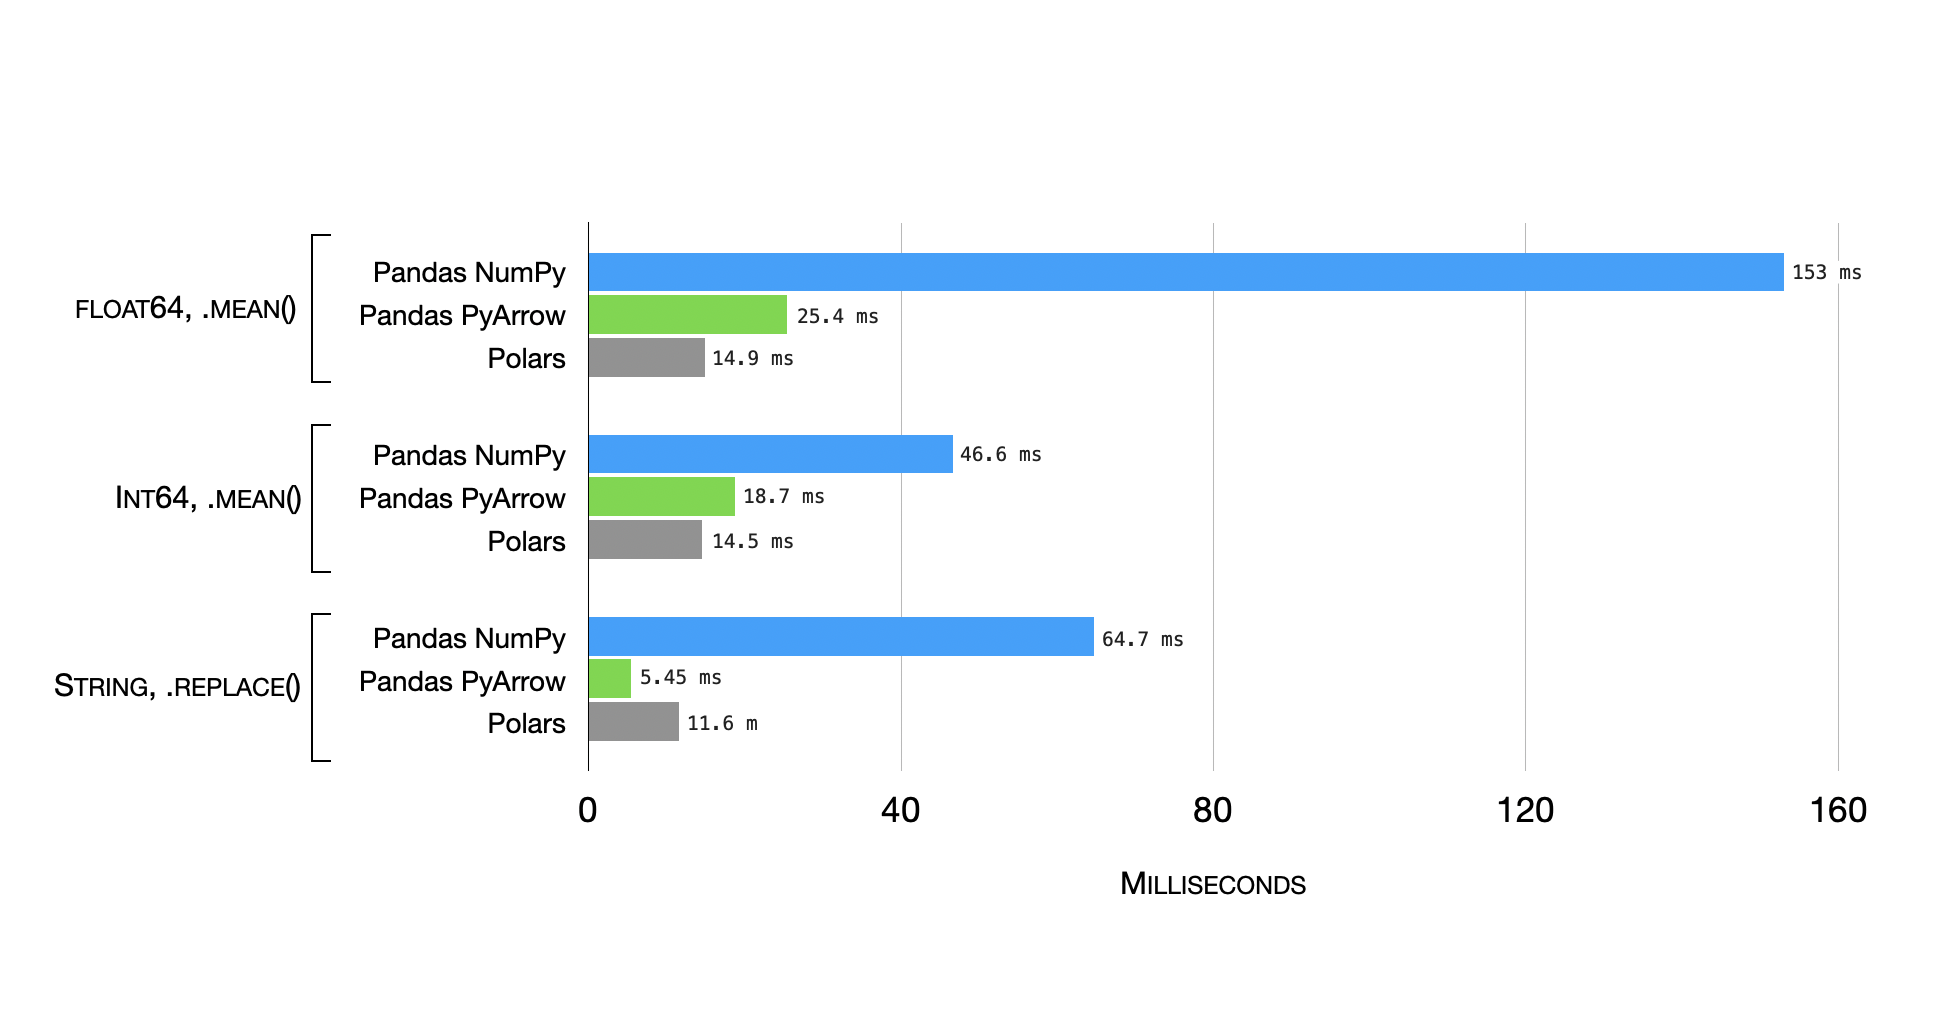

### Results from this colab session (TO-DO)